In [112]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
import torch.nn as nn
import torch.optim as optim
import torch

In [ ]:
from utils import MnistData
from models import ModelManager, ModelType

In [ ]:
model_loaded = ModelManager.get_trained(ModelType.MnistCnnPatt)
generator = ModelManager.get_untrained(ModelType.MnistGanGenerator)
discriminator = ModelManager.get_untrained(ModelType.MnistGanDiscriminator)

In [ ]:
data = MnistData()

In [ ]:
images = None

In [263]:
generator = ModelManager.get_untrained(ModelType.MnistGanGenerator)
discriminator = ModelManager.get_untrained(ModelType.MnistGanDisTwo)

--- 0 ---


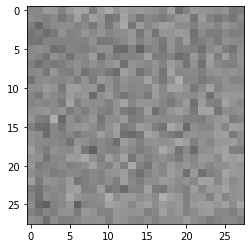

--- 1 ---


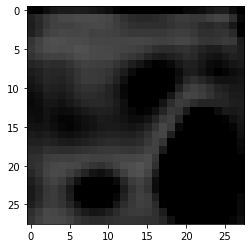

--- 2 ---


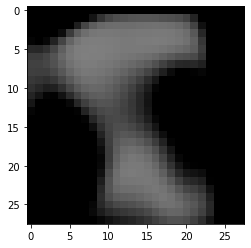

--- 3 ---


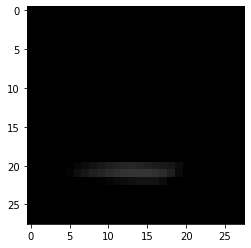

--- 4 ---


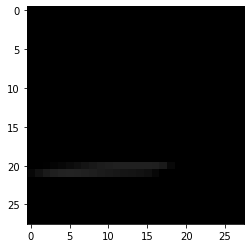

In [264]:
batch_size = 100
loss_fn = nn.BCELoss()
discriminator_optimizer = optim.Adam(discriminator.parameters(), lr=1e-2)
generator_optimizer = optim.Adam(generator.parameters(), lr=1e-2)
batch, _ = data.get_training_batch(batch_size)
rand_batch = torch.rand((batch_size, 1, 28, 28))
images = batch
for epoch in range(5):
    batch, _ = data.get_training_batch(batch_size)
    rand_batch = torch.rand((batch_size, 1, 28, 28))
    images = generator(rand_batch)
    generator_optimizer.zero_grad()
    
    discriminator_optimizer.zero_grad()
    
    loss_one = loss_fn(discriminator(images), torch.ones(batch_size, 1))
    loss_one.backward(retain_graph=True)
    generator_optimizer.step()

    discriminator_optimizer.zero_grad()
    loss_two = loss_fn(discriminator(images.detach()), torch.zeros(batch_size, 1)) \
        + loss_fn(discriminator(batch), torch.ones(batch_size, 1))
    loss_two.backward()
    discriminator_optimizer.step()
    
    #batch, _ = data.get_training_batch(batch_size)
    
    if epoch % 1 == 0:
        print(f'--- {epoch} ---')
        MnistData.display(images[0], scale=True)

In [265]:
discriminator(images), discriminator(batch)

(tensor([[0.4978],
         [0.4978],
         [0.4978],
         [0.4978],
         [0.4978],
         [0.4978],
         [0.4978],
         [0.4978],
         [0.4978],
         [0.4978],
         [0.4978],
         [0.4978],
         [0.4978],
         [0.4978],
         [0.4978],
         [0.4978],
         [0.4978],
         [0.4978],
         [0.4978],
         [0.4978],
         [0.4978],
         [0.4978],
         [0.4978],
         [0.4978],
         [0.4978],
         [0.4978],
         [0.4978],
         [0.4978],
         [0.4978],
         [0.4978],
         [0.4978],
         [0.4978],
         [0.4978],
         [0.4978],
         [0.4978],
         [0.4978],
         [0.4978],
         [0.4978],
         [0.4978],
         [0.4978],
         [0.4978],
         [0.4978],
         [0.4978],
         [0.4978],
         [0.4978],
         [0.4978],
         [0.4978],
         [0.4978],
         [0.4978],
         [0.4978],
         [0.4978],
         [0.4978],
         [0.

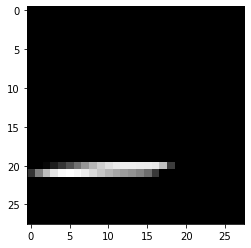

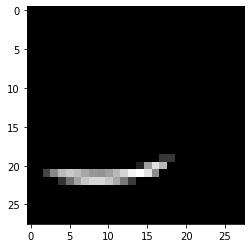

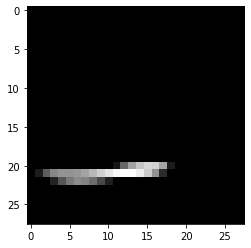

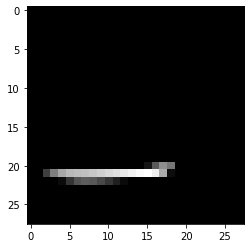

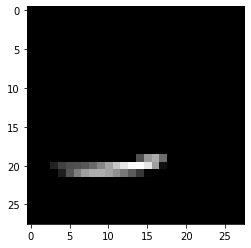

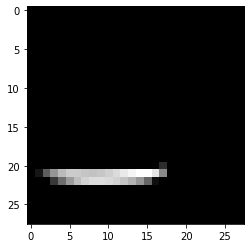

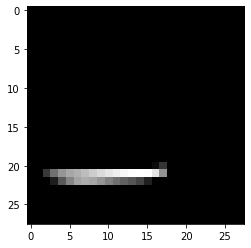

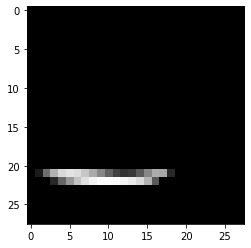

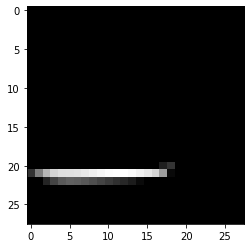

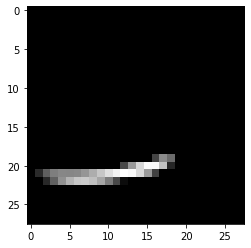

In [266]:
#images = generator(model_loaded(data.get_training_batch(batch_size)[0]) * 0.9)
for i in range(min(batch_size, 10)):
    MnistData.display(images[i])

In [ ]:
ModelManager.save_model(ModelType.MnistGanDiscriminator, discriminator)

In [214]:
batch_size = 20
step_size = 1e-3
_, labels = data.get_training_batch(batch_size)
#images = torch.rand((batch_size, 1, 28, 28))
#n = images.detach()
n = torch.zeros((batch_size, 1, 28, 28))
loss_fn = nn.CrossEntropyLoss()
for i in range(100):
    n.requires_grad = True
    if n.grad is not None:
        n.grad.zero_()
    loss = loss_fn(model_loaded(n), labels)
    loss.backward()
    new_images = n - step_size * n.grad.apply_(lambda x: 1 if x >= 0 else -1)
    n = MnistData.clip_for_image(new_images)

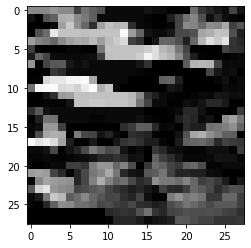

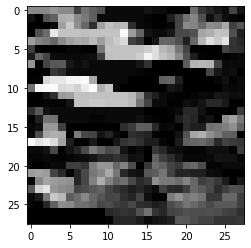

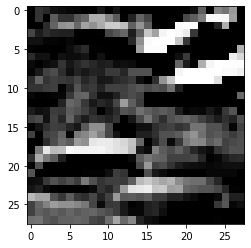

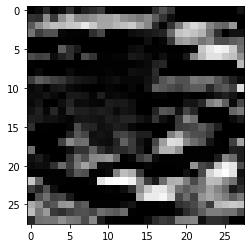

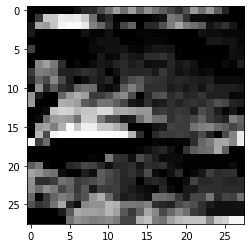

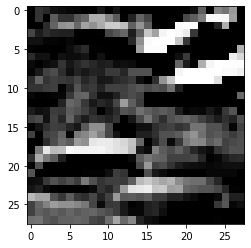

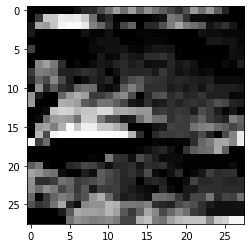

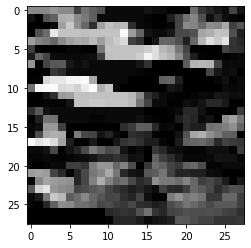

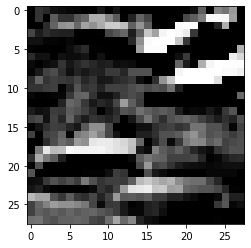

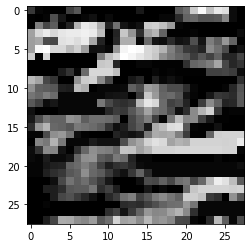

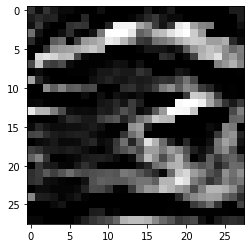

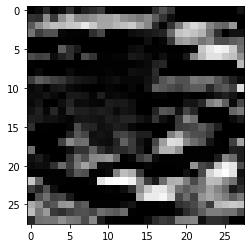

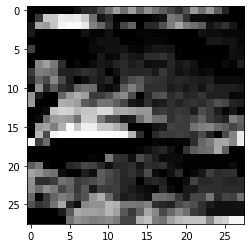

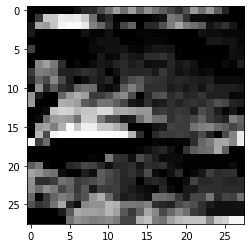

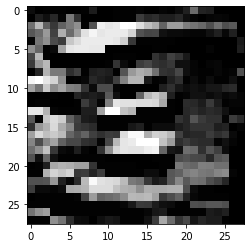

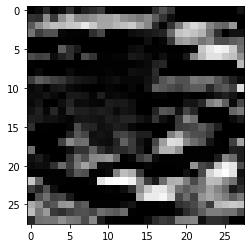

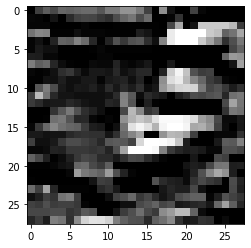

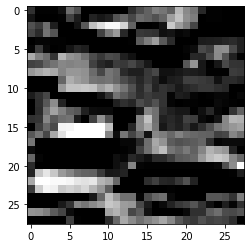

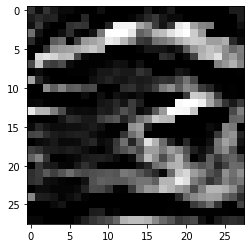

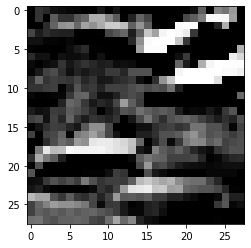

In [215]:
for i in range(min(batch_size, 20)):
    MnistData.display(n[i])